In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Read data

In [2]:
df = pd.read_csv("cleaned_data_project3.csv", index_col=0)
df.head()

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x19,x20,x21,x22,x23,x25,x26,x28,x29,x31
0,1,0.080262,1,50,5,5,5,4,3,5,...,5,3,4,3,-1.730803,1,1,1,-1.725104,2.380952
1,1,1.089816,1,44,1,1,1,1,3,3,...,4,4,4,2,-1.731503,0,1,1,-1.697040,10.000000
2,0,0.235445,1,72,3,1,5,5,3,2,...,3,1,3,2,-1.731503,0,1,3,-1.683108,10.000000
3,0,1.601126,1,38,1,3,1,3,5,1,...,4,1,4,5,-1.731503,0,0,3,-1.700973,10.000000
4,1,1.053820,0,37,5,5,5,5,2,5,...,4,4,4,5,-1.731503,0,1,1,-1.718505,10.000000


# 2. Train-test-split

In [3]:
y = df["y"]
x = df.drop(columns="y")
print(x.shape, y.shape)

(101174, 23) (101174,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train, x_test, sep="\n")

             x2  x3  x5  x9  x10  x11  x12  x13  x14  x15  ...  x19  x20  x21  \
33471 -1.067377   1  50   4    3    3    4    4    4    4  ...    5    5    5   
9779  -1.378309   0  51   1    5    4    5    2    1    1  ...    1    1    4   
61009  1.350021   0  27   4    4    4    4    5    5    5  ...    4    4    4   
73581  1.525001   1  66   1    4    1    3    3    5    4  ...    4    4    4   
33816 -1.466932   0  41   4    3    4    4    3    4    4  ...    4    3    4   
...         ...  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
21243 -0.068788   1  26   3    3    3    2    2    3    2  ...    5    4    4   
45891  0.038367   0  37   5    5    5    5    2    5    2  ...    4    5    5   
42613  0.736889   0  34   3    5    2    3    5    2    5  ...    3    5    5   
43567  0.930101   0  33   2    4    2    3    5    2    5  ...    2    2    4   
68268  0.018769   1  54   3    4    4    4    1    4    4  ...    4    4    4   

       x22       x23  x25  

# 3. Model, predict and solve the problem

In [5]:
lr_0 = LogisticRegression(max_iter=100000)
lr_0.fit(x_train, y_train)
lr_0_score = lr_0.score(x_test, y_test)
lr_0_predict = lr_0.predict(x_test)
lr_0_preProb = lr_0.predict_proba(x_test)

Accuracy: 0.891
Precision: 0.880
Recall: 0.865
F1 Score: 0.872


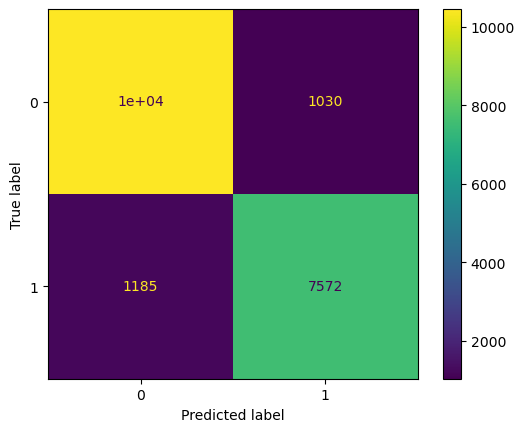

In [6]:
accuracy = metrics.accuracy_score(y_test, lr_0_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, lr_0_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, lr_0_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, lr_0_predict)
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, lr_0_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Test AUC: 0.9529296185683569


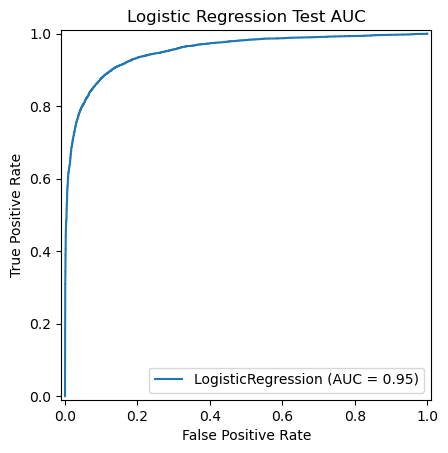

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_0_preProb[:,1])
roc_auc = metrics.auc(fpr, tpr)
print("Test AUC:", roc_auc)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 name='LogisticRegression')
display.plot()
plt.title("Logistic Regression Test AUC")
plt.show()


Train AUC: 0.9495634563205361


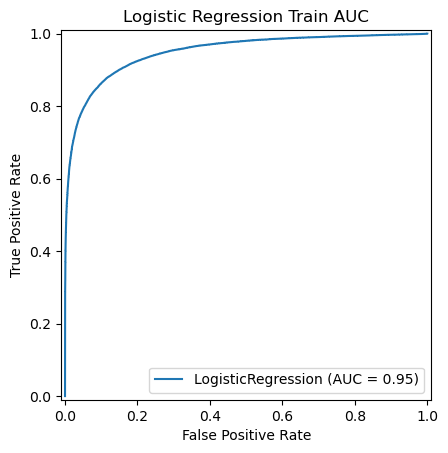

In [13]:
lr_0_preProb_train = lr_0.predict_proba(x_train)

fpr, tpr, thresholds = metrics.roc_curve(y_train, lr_0_preProb_train[:,1])
roc_auc = metrics.auc(fpr, tpr)
print("Train AUC:", roc_auc)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 name='LogisticRegression')
display.plot()
plt.title("Logistic Regression Train AUC")
plt.show()


# 4. Hyper-parameter tuning

In [14]:
param_grid_lr = {'solver': ['lbfgs', 'saga', 'liblinear'],
                  'penalty': ['l1','l2'],
                 'C': [0.001,0.01,0.1,1,10,100,1000],
                  'max_iter' : [10,100,500]}

lr_grid = GridSearchCV(estimator=LogisticRegression(), 
                        param_grid=param_grid_lr, 
                        scoring='roc_auc', n_jobs=-1)

lr_grid.fit(x_train, y_train)

c:\anaconda3\envs\UF_ADS_313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
105 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\anaconda3\envs\UF_ADS_313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\anaconda3\envs\UF_ADS_313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\anaconda3\envs\UF_ADS_313\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'max_iter': [10, 100, ...], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'saga', ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [15]:
print(lr_grid.best_params_)
best_lr = lr_grid.best_estimator_

{'C': 10, 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy: 0.890
Precision: 0.880
Recall: 0.865
F1 Score: 0.872


Text(113.9222222222222, 0.5, 'predicted label')

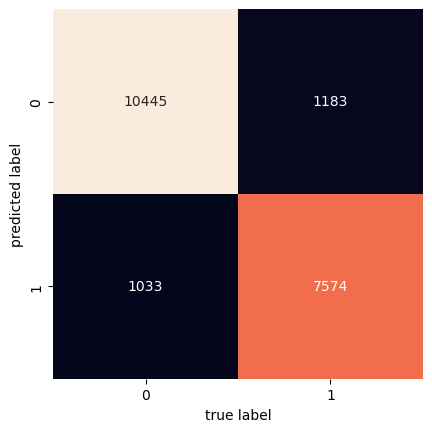

In [16]:
accuracy = metrics.accuracy_score(y_test, best_lr.predict(x_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, best_lr.predict(x_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, best_lr.predict(x_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, best_lr.predict(x_test))
print("F1 Score: %.3f" % f1)

cm_best_lg2 = metrics.confusion_matrix(y_test, best_lr.predict(x_test))
sns.heatmap(cm_best_lg2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

0.9529228333659958


c:\anaconda3\envs\UF_ADS_313\Lib\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


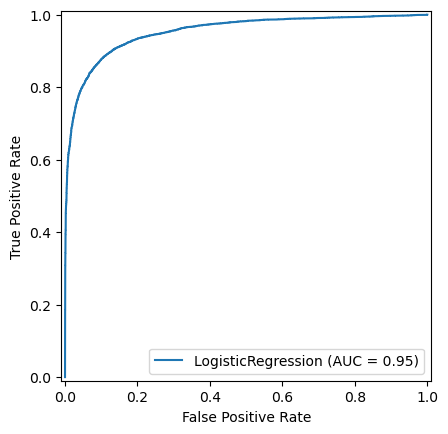

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_lr.predict_proba(x_test)[:,1])
roc_auc_best_lr = metrics.auc(fpr, tpr)
print(roc_auc_best_lr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_best_lr,
                                 estimator_name='LogisticRegression')
display.plot()
plt.show()

# 5. Conclusion

Default LogisticRegression shows AUC 0.9529296185683569.
Hyper-parameter tuned model shows AUC 0.9529228333659958.

Default LogisticRegression shows slightly higher AUC than hyper parameter tuning.